# Python Assignment: Analyzing Rainfall and Creek Data 

Background:
Strawberry Creek flows through UC Berkeley and serves as an example of successful conservation efforts. Once heavily polluted, the creek has experienced significant water quality improvements since 1978. Native fish were reintroduced in 1989, and today, they continue to thrive, showcasing the positive impact of restoration initiatives.

To monitor the creek’s condition, six sampling locations have been established along its course. These sites are used to track temperature, water depth, and electrical conductivity over time, with a focus on responses to rainfall events and water main breaks.

Objective:
This assignment involves analyzing one of the sensor data collected in May 2023. You will be guided through the process of data analysis and exploration within a hydrological context. Your task is to investigate the relationship between rainfall and water conductivity in Strawberry Creek using the provided datasets.

You will complete these assignments with a mix of responses as code and narrative text within this jupyter notebook document. Once finished, go to File > Save and Export Notebook as..., and export as a PDF before uploading the assignment to Gradescope.  

Look for triple @@@ signs in places where we expect you to write code or respond to a question. The rest of the notebook should not require modification.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [1] Import Rainfall and Creek data

To start, import the rainfall and creek data as a Pandas DataFrame. 

In [2]:
#load the datasets 
rainfall_data = pd.read_csv('rainfall.csv')
creek_data = pd.read_csv('CreekData.csv')

In [3]:
# Display rainfall data 
rainfall_data

,Unnamed: 0,start_time,end_time,inches
0,0,2023-05-02 12:15:00+00:00,2023-05-02 13:00:00+00:00,0.08
1,1,2023-05-02 13:45:00+00:00,2023-05-02 15:00:00+00:00,0.25
2,2,2023-05-02 15:30:00+00:00,2023-05-02 15:45:00+00:00,0.01
3,3,2023-05-02 16:30:00+00:00,2023-05-02 16:45:00+00:00,0.06
4,4,2023-05-02 17:30:00+00:00,2023-05-02 17:45:00+00:00,0.01
5,5,2023-05-03 00:00:00+00:00,2023-05-03 00:30:00+00:00,0.03
6,6,2023-05-03 02:15:00+00:00,2023-05-03 02:30:00+00:00,0.13
7,7,2023-05-03 02:45:00+00:00,2023-05-03 03:00:00+00:00,0.02
8,8,2023-05-03 06:15:00+00:00,2023-05-03 06:30:00+00:00,0.01
9,9,2023-05-03 06:45:00+00:00,2023-05-03 09:00:00+00:00,0.16


In [13]:
# Drop first and second column of the rainfall data
rainfall_data_clean = rainfall_data.drop(rainfall_data.columns[[0,1]], axis=1)
rainfall_data_clean

,end_time,inches
0,2023-05-02 13:00:00+00:00,0.08
1,2023-05-02 15:00:00+00:00,0.25
2,2023-05-02 15:45:00+00:00,0.01
3,2023-05-02 16:45:00+00:00,0.06
4,2023-05-02 17:45:00+00:00,0.01
5,2023-05-03 00:30:00+00:00,0.03
6,2023-05-03 02:30:00+00:00,0.13
7,2023-05-03 03:00:00+00:00,0.02
8,2023-05-03 06:30:00+00:00,0.01
9,2023-05-03 09:00:00+00:00,0.16


In [5]:
# Display creek data
creek_data

,Unnamed: 0,DateTime,TimeOffset,DateTimeUTC,Meter_Hydros21_Cond,Meter_Hydros21_Depth,Meter_Hydros21_Temp,EnviroDIY_Mayfly_Batt,EnviroDIY_Mayfly_Temp,Digi_Cellular_SignalPercent
0,126509,2023-05-01 00:00:00,-8,2023-04-30 16:00:00,428.3,389.8,17.6,4.139,29.25,109.0
1,126510,2023-05-01 00:05:00,-8,2023-04-30 16:05:00,428.3,390.0,17.6,4.139,28.75,109.0
2,126511,2023-05-01 00:10:00,-8,2023-04-30 16:10:00,427.3,390.5,17.6,4.139,28.50,109.0
3,126512,2023-05-01 00:15:00,-8,2023-04-30 16:15:00,428.3,398.2,17.6,4.139,27.75,109.0
4,126513,2023-05-01 00:20:00,-8,2023-04-30 16:20:00,428.8,397.3,17.6,4.139,27.00,109.0
...,...,...,...,...,...,...,...,...,...,...
8166,134675,2023-05-31 23:35:00,-8,2023-05-31 15:35:00,404.7,360.0,18.8,4.154,28.50,109.0
8167,134676,2023-05-31 23:40:00,-8,2023-05-31 15:40:00,405.2,360.2,18.8,4.154,28.25,71.0
8168,134677,2023-05-31 23:45:00,-8,2023-05-31 15:45:00,405.3,360.3,18.8,4.154,28.00,109.0
8169,134678,2023-05-31 23:50:00,-8,2023-05-31 15:50:00,405.7,358.5,18.8,4.154,28.00,71.0


In [47]:
# Drop first and second column of the creek data
creek_data_clean = creek_data.drop(creek_data.columns[[0,1]], axis=1)
creek_data_clean

,TimeOffset,DateTimeUTC,Meter_Hydros21_Cond,Meter_Hydros21_Depth,Meter_Hydros21_Temp,EnviroDIY_Mayfly_Batt,EnviroDIY_Mayfly_Temp,Digi_Cellular_SignalPercent
0,-8,2023-04-30 16:00:00,428.3,389.8,17.6,4.139,29.25,109.0
1,-8,2023-04-30 16:05:00,428.3,390.0,17.6,4.139,28.75,109.0
2,-8,2023-04-30 16:10:00,427.3,390.5,17.6,4.139,28.50,109.0
3,-8,2023-04-30 16:15:00,428.3,398.2,17.6,4.139,27.75,109.0
4,-8,2023-04-30 16:20:00,428.8,397.3,17.6,4.139,27.00,109.0
...,...,...,...,...,...,...,...,...
8166,-8,2023-05-31 15:35:00,404.7,360.0,18.8,4.154,28.50,109.0
8167,-8,2023-05-31 15:40:00,405.2,360.2,18.8,4.154,28.25,71.0
8168,-8,2023-05-31 15:45:00,405.3,360.3,18.8,4.154,28.00,109.0
8169,-8,2023-05-31 15:50:00,405.7,358.5,18.8,4.154,28.00,71.0


In [15]:
# Check for missing values
print("\nMissing values in Creek Data:")
print(creek_data_clean.isnull().sum())
print("\nMissing values in Rainfall Data:")
print(rainfall_data_clean.isnull().sum())


Missing values in Creek Data:
TimeOffset                     0
DateTimeUTC                    0
Meter_Hydros21_Cond            0
Meter_Hydros21_Depth           0
Meter_Hydros21_Temp            0
EnviroDIY_Mayfly_Batt          0
EnviroDIY_Mayfly_Temp          0
Digi_Cellular_SignalPercent    0
dtype: int64

Missing values in Rainfall Data:
end_time    0
inches      0
dtype: int64


In [16]:
# Convert rainfall and creek data UTC date columns to datetime format
rainfall_data_clean['end_time'] = pd.to_datetime(rainfall_data_clean['end_time'])
rainfall_data_clean.set_index('end_time', inplace=True)

creek_data_clean['DateTimeUTC'] = pd.to_datetime(creek_data_clean['DateTimeUTC'])
creek_data_clean.set_index('DateTimeUTC', inplace=True)


In [35]:
# Average rainfall and creek data variables into daily averages

rainfall_data_daily_average = rainfall_data_clean.resample('D').mean()
rainfall_data_daily_average = rainfall_data_daily_average.fillna(0)
rainfall_data_daily_average.reset_index(inplace=True)

creek_data_daily_average = creek_data_clean.resample('D').mean()
creek_data_daily_average = creek_data_daily_average.fillna(0)
creek_data_daily_average.reset_index(inplace=True)
creek_data_daily_average

,DateTimeUTC,TimeOffset,Meter_Hydros21_Cond,Meter_Hydros21_Depth,Meter_Hydros21_Temp,EnviroDIY_Mayfly_Batt,EnviroDIY_Mayfly_Temp,Digi_Cellular_SignalPercent
0,2023-04-30,-8.0,428.644211,391.714737,17.617158,4.127947,16.371053,103.800000
1,2023-05-01,-8.0,423.237153,393.413194,16.968889,4.104417,13.269965,105.173611
2,2023-05-02,-8.0,350.315625,417.953125,16.163571,4.109429,15.255580,105.290179
3,2023-05-03,-8.0,257.167339,394.866129,16.073508,4.120855,14.443548,99.600806
4,2023-05-04,-8.0,354.481273,375.838577,16.708052,4.102933,14.485955,102.026217
5,2023-05-05,-8.0,406.168841,378.806884,16.889964,4.115370,16.673007,104.456522
6,2023-05-06,-8.0,317.922594,391.224686,16.649916,4.108372,15.650628,102.025105
7,2023-05-07,-8.0,375.205614,373.307018,16.983263,4.121947,18.719298,100.333333
8,2023-05-08,-8.0,382.303943,379.035484,17.128674,4.122226,17.286738,96.215054
9,2023-05-09,-8.0,393.737979,371.164111,17.329582,4.125463,18.236063,103.306620


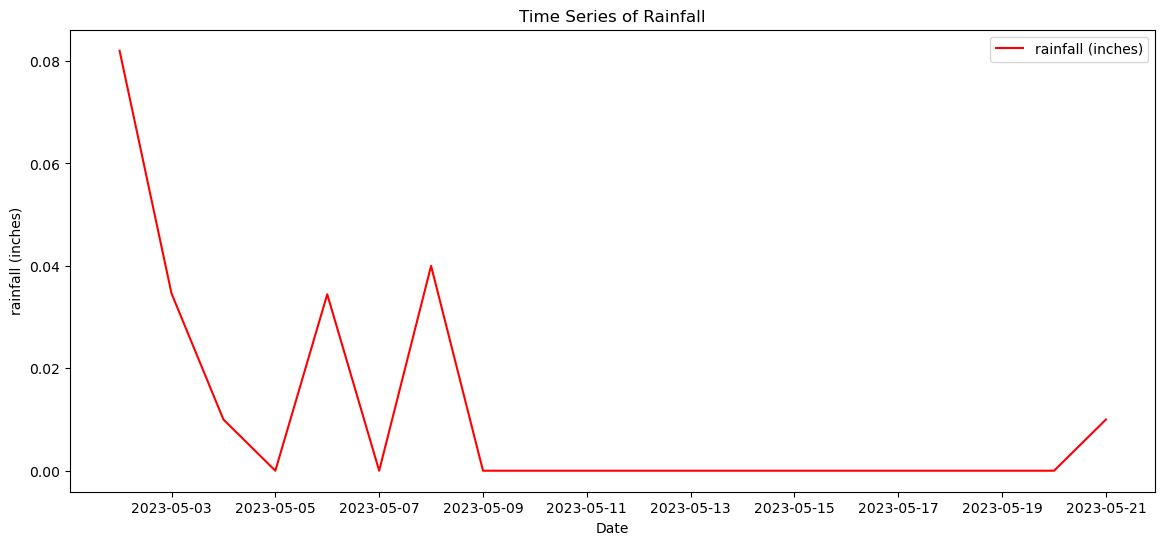

In [36]:
# Plot time series for rainfall
plt.figure(figsize=(14, 6))
plt.plot(rainfall_data_daily_average['end_time'], rainfall_data_daily_average['inches'], label='rainfall (inches)', color='r')
plt.xlabel('Date')
plt.ylabel('rainfall (inches)')
plt.title('Time Series of Rainfall')
plt.legend()
plt.show()

/tmp/ipykernel_83/1158527251.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


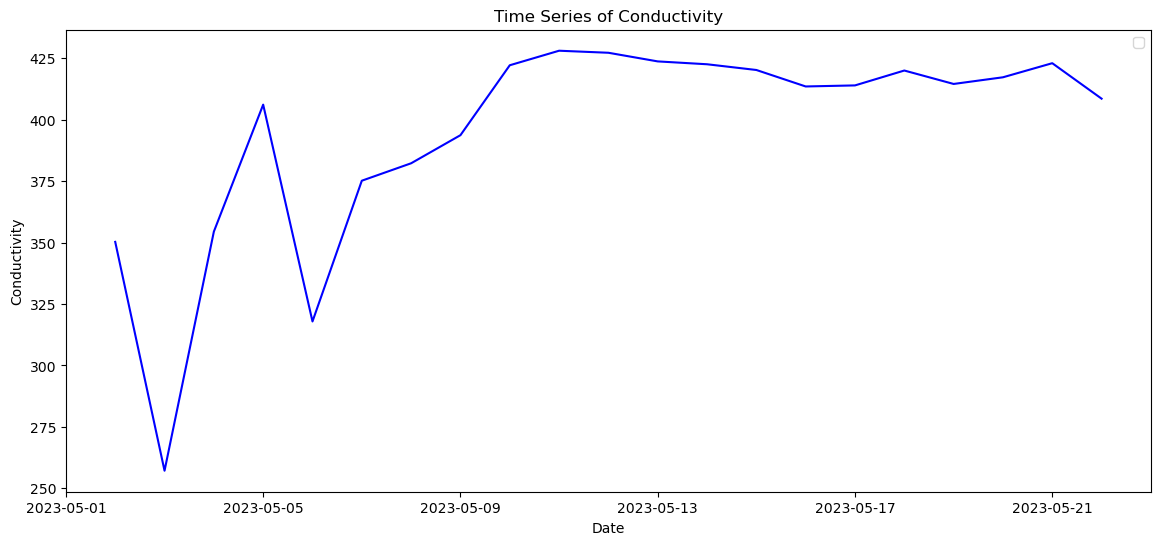

In [37]:
# Plot time series for conductivity
plt.figure(figsize=(14, 6))
plt.plot(creek_data_daily_average['DateTimeUTC'][2:23], creek_data_daily_average['Meter_Hydros21_Cond'][2:23], color='b')
plt.xlabel('Date')
plt.ylabel('Conductivity')
plt.title('Time Series of Conductivity')
plt.legend()
plt.show()

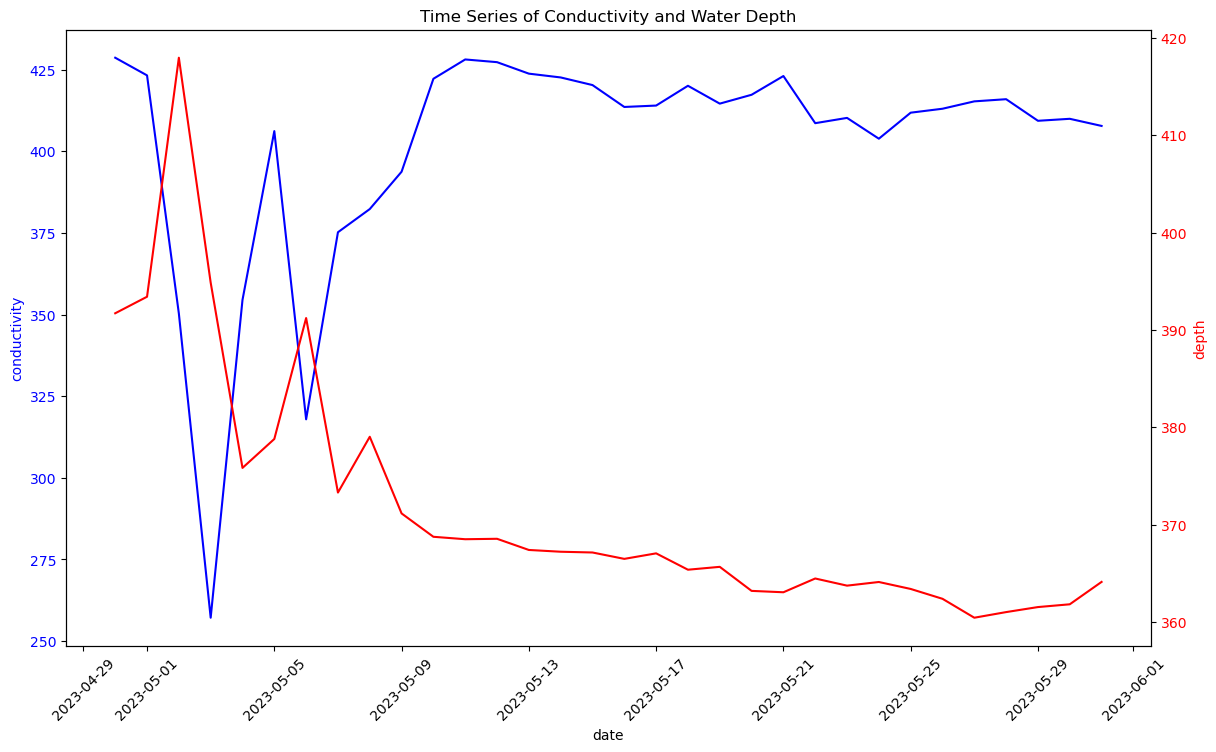

In [46]:
# plot the relationship between conductivity and water depth

fig, ax1 = plt.subplots(figsize=(14, 8))

# plot the conductivity variables on the left-axis 
ax1.plot(creek_data_daily_average['DateTimeUTC'], creek_data_daily_average['Meter_Hydros21_Cond'], color='b')
ax1.set_xlabel('date')
ax1.set_ylabel('conductivity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Tilt the x-tick labels
plt.xticks(rotation=45)

#create a second y-axis for depth
ax2 = ax1.twinx()
ax2.plot(creek_data_daily_average['DateTimeUTC'], creek_data_daily_average['Meter_Hydros21_Depth'], color='r')
ax2.set_ylabel('depth', color='r')
ax2.tick_params(axis='y', labelcolor='r')



plt.title('Time Series of Conductivity and Water Depth')
plt.show()

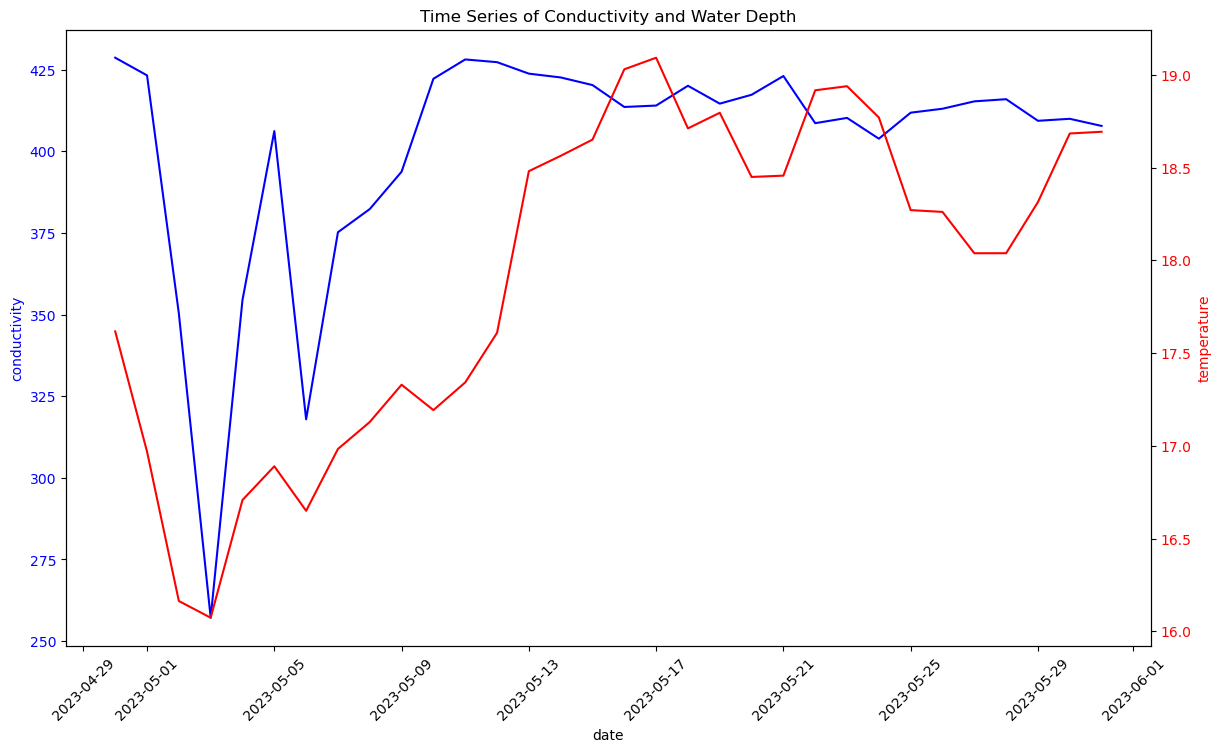

In [49]:
# plot the relationship between conductivity and water temperature

fig, ax1 = plt.subplots(figsize=(14, 8))

# plot the conductivity variables on the left-axis 
ax1.plot(creek_data_daily_average['DateTimeUTC'], creek_data_daily_average['Meter_Hydros21_Cond'], color='b')
ax1.set_xlabel('date')
ax1.set_ylabel('conductivity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Tilt the x-tick labels
plt.xticks(rotation=45)

#create a second y-axis for depth
ax2 = ax1.twinx()
ax2.plot(creek_data_daily_average['DateTimeUTC'], creek_data_daily_average['Meter_Hydros21_Temp'], color='r')
ax2.set_ylabel('temperature', color='r')
ax2.tick_params(axis='y', labelcolor='r')



plt.title('Time Series of Conductivity and Water Depth')
plt.show()

Short Answer Questions:

Explain why increased rainfall might lead to changes in water conductivity in a creek?

What are other potential factors, aside from rainfall, that could influence conductivity levels in a creek?

Summarize your findings, including any patterns or significant relationships discovered.


Answer: 

Increased rainfall can lead to changes in water conductivity due to the influx of runoff that carries dissolved ions, minerals, and other materials from surrounding land into the creek. This process can increase the concentration of these substances, thus affecting the conductivity. Additionally, dilution effects from significant rainfall events can temporarily lower conductivity if the water entering the creek is low in dissolved ions.

Based on the plot water depth and temperature could influence conductivity. 

